In [1]:
from cv_paper_plots import xfreq_analysis
import h5py, os
from importlib import reload
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from ecog.utils import bands

In [2]:
folder = os.path.join(os.environ['HOME'],'Development/data/ecog/AA_ff/')
subjects = ['ec2', 'ec9', 'gp31', 'gp33']
files = ['EC2_blocks_1_8_9_15_76_89_105_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'EC9_blocks_15_39_46_49_53_60_63_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP31_blocks_1_2_4_6_9_21_63_65_67_69_71_78_82_83_CV_AA_ff_align_window_-0.5_to_0.79_file.h5',
         'GP33_blocks_1_5_30_CV_AA_ff_align_window_-0.5_to_0.79_file.h5']

# Create data

In [3]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
channels = [103, 106]
with h5py.File(os.path.join(folder, files[0])) as f:
    for ch in channels:
        xfreq_analysis.save_power(f, ch, cv, subject)

In [4]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_correlations(f, subject)

ec2
ec9
gp31
gp33


In [5]:
reload(xfreq_analysis)
for subject, f_name in zip(subjects, files):
    print(subject)
    with h5py.File(os.path.join(folder, f_name)) as f:
        xfreq_analysis.save_hg_power(f, subject)

ec2
ec9
gp31
gp33


# Plot 1

In [203]:
plt.close()
f = plt.figure(figsize=(6, 7))

l_edge = .115
t_edge = .05
r_edge = .05
b_edge = .075

v_gap = .15

h1_gap = .075
h2_gap = .075

r1_height = .4
r3_height = .2
r2_height = 1. - t_edge - r1_height - h1_gap - h2_gap - r3_height - b_edge

width = (1. - l_edge - r_edge - v_gap) / 2.

c1_x = l_edge + width + v_gap

r1_y = h1_gap + r2_height + h2_gap + r3_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])

r2_y = h2_gap + r3_height + b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

r3_y = b_edge
ax4 = f.add_axes([l_edge, r3_y, width, r3_height])
ax5 = f.add_axes([c1_x, r3_y, width, r3_height])

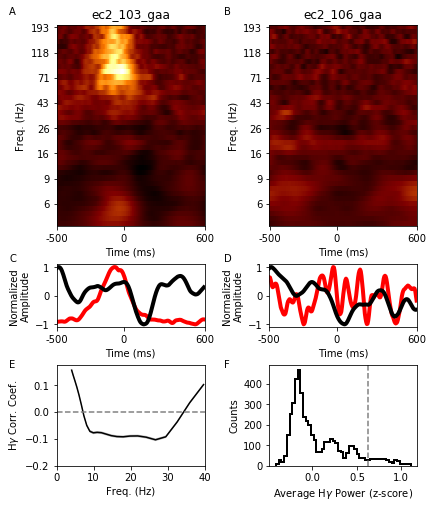

In [204]:
reload(xfreq_analysis)
subject = 'ec2'
cv = 'gaa'
ch = 103
xfreq_analysis.plot_power(subject, ch, cv, [ax0, ax2], vmin=-0.725590412048, vmax=2.90856576009)

ch = 106
xfreq_analysis.plot_power(subject, ch, cv, [ax1, ax3], vmin=-0.725590412048, vmax=2.90856576009)

xfreq_analysis.plot_correlations(subject, ax4, kind='freq')

xfreq_analysis.plot_power_correlations(subject, ax5, num=1)

x0 = .005
y0 = .97
x1 = .502
y1 = .48
y2 = .27

f.text(x0, y0, 'A')
f.text(x1, y0, 'B')
f.text(x0, y1, 'C')
f.text(x1, y1, 'D')
f.text(x0, y2, 'E')
f.text(x1, y2, 'F')

plt.savefig('/home/jesse/Downloads/xfreq1.pdf')

plt.show()

# Plot 2

In [208]:
plt.close()
f = plt.figure(figsize=(6, 4))

l_edge = .115
t_edge = .075
r_edge = .015
b_edge = .15

v1_gap = .1

h_gap = .125

r1_height = .4
r2_height = 1. - t_edge - r1_height - v1_gap - b_edge

width = (1. - l_edge - r_edge - h_gap) / 2.

c1_x = l_edge + width + h_gap

r1_y = h1_gap + r2_height + b_edge
ax0 = f.add_axes([l_edge, r1_y, width, r1_height])
ax1 = f.add_axes([c1_x, r1_y, width, r1_height])

r2_y = b_edge
ax2 = f.add_axes([l_edge, r2_y, width, r2_height])
ax3 = f.add_axes([c1_x, r2_y, width, r2_height])

/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jesse/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:114: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


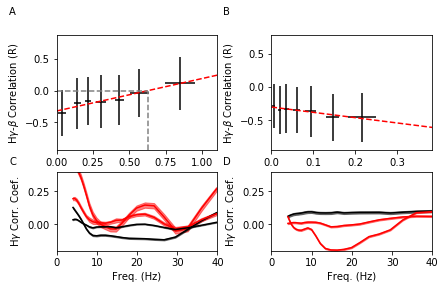

In [209]:
reload(xfreq_analysis)
xfreq_analysis.plot_power_correlations('ec2', ax0, num=2)
xfreq_analysis.plot_power_correlations('gp31', ax1, num=2)

xfreq_analysis.plot_resolved_power_correlations(['ec2', 'gp33'], ax2)
xfreq_analysis.plot_resolved_power_correlations(['ec9', 'gp31'], ax3)

x0 = .005
y0 = .97
x1 = .501
y1 = .45

f.text(x0, y0, 'A')
f.text(x1, y0, 'B')
f.text(x0, y1, 'C')
f.text(x1, y1, 'D')

plt.savefig('/home/jesse/Downloads/xfreq2.pdf')

plt.show()